#Description: 


- @Author: William David Otálora Moreno
- @Date:2022/03/19
- @Description: In this notebook we are going to apply the algorithm on a data set of Tesla shares on the United States stock market, where we will find:

  - The CLOSE signal (daily closing price)
  - The VOLUME signal (number of shares that have changed hands over that period of time).


#DATOS DE MERCADEO DE VALORES (Acciones de Tesla)

#Importando librerías generales


In [61]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing  #para normalizar los datos antes de aplicar al algoritmo
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D

#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

#Descargando data usando Web-scrawping


In [67]:
#UrlWeb="https://es.wikipedia.org/wiki/Departamentos_de_Colombia"
#ClassName="wikitable sortable jquery-tablesorter"
UrlWeb= "https://es-us.finanzas.yahoo.com/quote/TSLA/history?p=TSLA&.tsrc=fin-srch"
ClassName="W(100%) M(0)"  

Opt2-con Selenium




In [76]:
!pip install kora -q
!apt install chromium-chromedriver
!pip install selenium

Reading package lists... Done
Building dependency tree       
Reading state information... Done
chromium-chromedriver is already the newest version (99.0.4844.51-0ubuntu0.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [77]:
from kora.selenium import wd
wd.get(UrlWeb)
soup = BeautifulSoup(wd.page_source, 'html.parser') 

In [78]:
tabla= soup.find_all(class_=ClassName)
df_list_table=pd.read_html(str(tabla))                                      # LEEMOS el THEAD y TBODY y lo guardamos en una lista
df=pd.DataFrame(df_list_table[0])    

In [79]:
#df.head(10)                                                       #LAS PRIMERAS FILAS
df.tail(10) 

,Fecha,Abrir,Alto,Bajo,Cierre*,Cierre ajustado**,Volumen
91,08 nov 2021,1149.79,1197.00,1133.00,1162.94,1162.94,33445700
92,05 nov 2021,1228.00,1239.87,1208.00,1222.09,1222.09,21579900
93,04 nov 2021,1234.41,1243.49,1217.00,1229.91,1229.91,25397400
94,03 nov 2021,1177.33,1215.39,1152.62,1213.86,1213.86,34628500
95,02 nov 2021,1159.36,1208.59,1146.00,1172.00,1172.00,42737800
96,01 nov 2021,1145.00,1209.75,1118.66,1208.59,1208.59,56048700
97,29 oct 2021,1081.86,1115.21,1073.21,1114.00,1114.00,29918400
98,28 oct 2021,1068.31,1081.00,1054.20,1077.04,1077.04,27213200
99,27 oct 2021,1039.66,1070.88,1030.78,1037.86,1037.86,38526500
100,*Precio de cierre ajustado para división de ac...,*Precio de cierre ajustado para división de ac...,*Precio de cierre ajustado para división de ac...,*Precio de cierre ajustado para división de ac...,*Precio de cierre ajustado para división de ac...,*Precio de cierre ajustado para división de ac...,*Precio de cierre ajustado para división de ac...


In [80]:
#tenemosque borrar la ultima fila
df = df[:-1]

#Conociendo los datos descargados

In [81]:
print(df.info())
print("____________describe____________\n",df.describe())
print("____________nulos?____________\n",df.isnull().sum())
#print("Rows, Cols->",df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Fecha              100 non-null    object
 1   Abrir              100 non-null    object
 2   Alto               100 non-null    object
 3   Bajo               100 non-null    object
 4   Cierre*            100 non-null    object
 5   Cierre ajustado**  100 non-null    object
 6   Volumen            100 non-null    object
dtypes: object(7)
memory usage: 5.6+ KB
None
____________describe____________
               Fecha   Abrir    Alto    Bajo Cierre* Cierre ajustado**  \
count           100     100     100     100     100               100   
unique           99      99      99     100      99                99   
top     18 mar 2022  874.49  907.85  867.40  905.39            905.39   
freq              2       2       2       1       2                 2   

         Volumen  
count     

#Normalización de los datos.

#Convertimos los campos object a datetime o numeric (int/float)

In [82]:
df['Fecha']= df['Fecha'].str.replace(' ene ','/01/')
df['Fecha']= df['Fecha'].str.replace(' feb ','/02/')
df['Fecha']= df['Fecha'].str.replace(' mar ','/03/')
df['Fecha']= df['Fecha'].str.replace(' abr ','/04/')
df['Fecha']= df['Fecha'].str.replace(' may ','/05/')
df['Fecha']= df['Fecha'].str.replace(' jun ','/06/')
df['Fecha']= df['Fecha'].str.replace(' jul ','/07/')
df['Fecha']= df['Fecha'].str.replace(' ago ','/08/')
df['Fecha']= df['Fecha'].str.replace(' sep ','/09/')
df['Fecha']= df['Fecha'].str.replace(' oct ','/10/')
df['Fecha']= df['Fecha'].str.replace(' nov ','/11/')
df['Fecha']= df['Fecha'].str.replace(' dic ','/12/')

In [83]:
df['Fecha']=pd.to_datetime(df['Fecha'], dayfirst = True)        # Convertimos el campo FECHA en tipo DATETIME
df['Abrir'] = pd.to_numeric(df['Abrir'])                        #  convertimos el campo a numerico 
df['Alto'] = pd.to_numeric(df['Alto'])
df['Bajo'] = pd.to_numeric(df['Bajo'])
df['Cierre*'] = pd.to_numeric(df['Cierre*'])
df['Cierre ajustado**'] = pd.to_numeric(df['Cierre ajustado**'])
df['Volumen'] = pd.to_numeric(df['Volumen'])

#Eliminando columnas que no necesitaremos 

In [87]:
#borrar nulos o no?
df = df.dropna()
df = df.reset_index(drop=True)

In [88]:
# Eliminamos columna de fecha que no usaremos en el algoritmo.
dates = df['Fecha'] # Guardamos la columna Date.
df = df.drop('Fecha', 1) # Borramos la columna del dataframe.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


Normaliza todos los datos entre [0, 1].

In [89]:
#%% Se normalizan los datos con MinMax()
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df)
df_escalado = pd.DataFrame(df_escalado) # Hay que convertir a DF el resultado.
df_escalado = df_escalado.rename(columns = {0:'Abrir',1:'Alto',2:'Bajo',3:'Cierre*',4: 'Cierre ajustado**', 5: 'Volumen'})

In [90]:
df_escalado.head()
#df_escalado.isnull().sum()

,Abrir,Alto,Bajo,Cierre*,Cierre ajustado**,Volumen
0,0.326018,0.241988,0.323791,0.303411,0.303411,0.460238
1,0.326018,0.241988,0.323772,0.303411,0.303411,0.458148
2,0.244560,0.167800,0.243172,0.230880,0.230880,0.221685
3,0.203382,0.093272,0.197795,0.163543,0.163543,0.344306
4,0.140219,0.010998,0.109420,0.081246,0.081246,0.223501


#Representación gráfica de los datos.

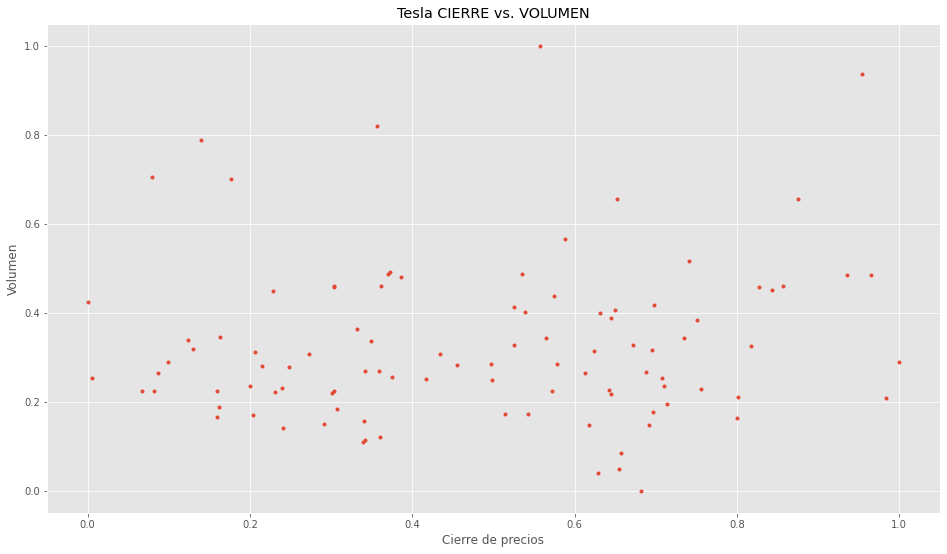

In [92]:
#%% Representación gráfica de los datos.
x = df_escalado['Cierre*'].values
y = df_escalado['Volumen'].values
plt.xlabel('Cierre de precios')
plt.ylabel('Volumen')
plt.title('Tesla CIERRE vs. VOLUMEN')
plt.plot(x,y,'o',markersize=3)

#Aplicación de k-means.

#Realizar una gráfica elbow o de codo

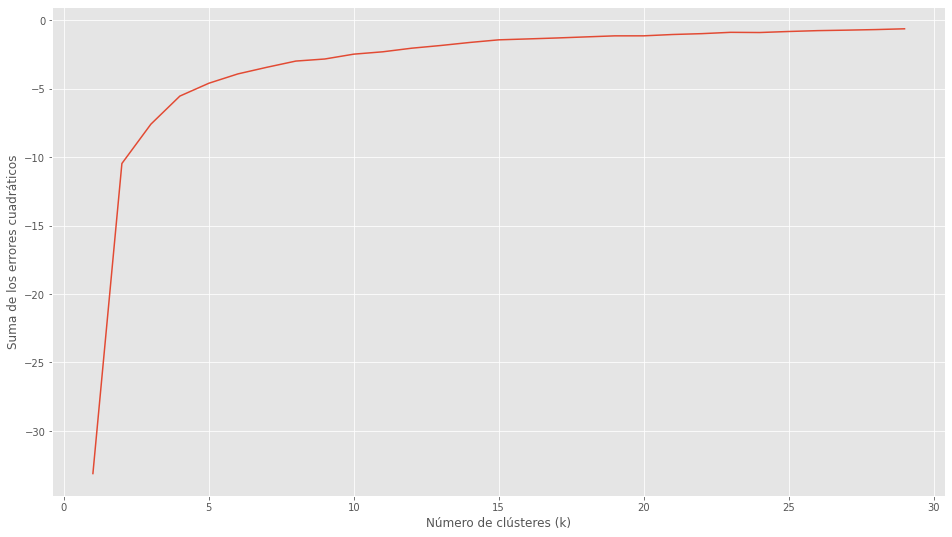

In [93]:
#%% Curva elbow para determinar valor óptimo de k.
nc = range(1, 30) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df_escalado).score(df_escalado) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

#Aplicar el algoritmo de k-mean

In [94]:
#%% Aplicación de k-means con k = 5.
kmeans = KMeans(n_clusters=5).fit(df_escalado)
centroids = kmeans.cluster_centers_
print(centroids)   #coordenadas de los centroides

[[0.88547245 0.91083621 0.83156351 0.86298037 0.86298037 0.52217488]
 [0.40225155 0.31415946 0.36920911 0.32878907 0.32878907 0.30473392]
 [0.61835886 0.57936494 0.5720677  0.5652886  0.5652886  0.35454845]
 [0.24425022 0.12272296 0.19268859 0.13543585 0.13543585 0.34019661]
 [0.72647003 0.70285172 0.70637929 0.69729651 0.69729651 0.21107437]]


#Etiquetado de datos.

In [95]:
#%% Etiquetamos nuestro dataframe.
labels = kmeans.predict(df_escalado)   #generamos las etiquetas de cada clouster
df['label'] = labels                   #añadimos la columna “label” a nuestro dataframe original

df.insert(0, 'Date', dates)           #%% Añadimos la columna de fecha

In [96]:
df.head(10)

,Date,Abrir,Alto,Bajo,Cierre*,Cierre ajustado**,Volumen,label
0,2022-03-18,874.49,907.85,867.40,905.39,905.39,33507638,1
1,2022-03-18,874.49,907.85,867.39,905.39,905.39,33408500,1
2,2022-03-17,830.99,875.00,825.72,871.60,871.60,22194300,3
3,2022-03-16,809.00,842.00,802.26,840.23,840.23,28009600,3
4,2022-03-15,775.27,805.57,756.57,801.89,801.89,22280400,3
5,2022-03-14,780.61,800.70,756.04,766.37,766.37,23717400,3
6,2022-03-11,840.20,843.80,793.77,795.35,795.35,22272800,3
7,2022-03-10,851.45,854.45,810.36,838.30,838.30,19549500,3
8,2022-03-09,839.48,860.56,832.01,858.97,858.97,19728000,3
9,2022-03-08,795.53,849.99,782.17,824.40,824.40,26799700,3


#Representación gráfica de los clústeres k-means

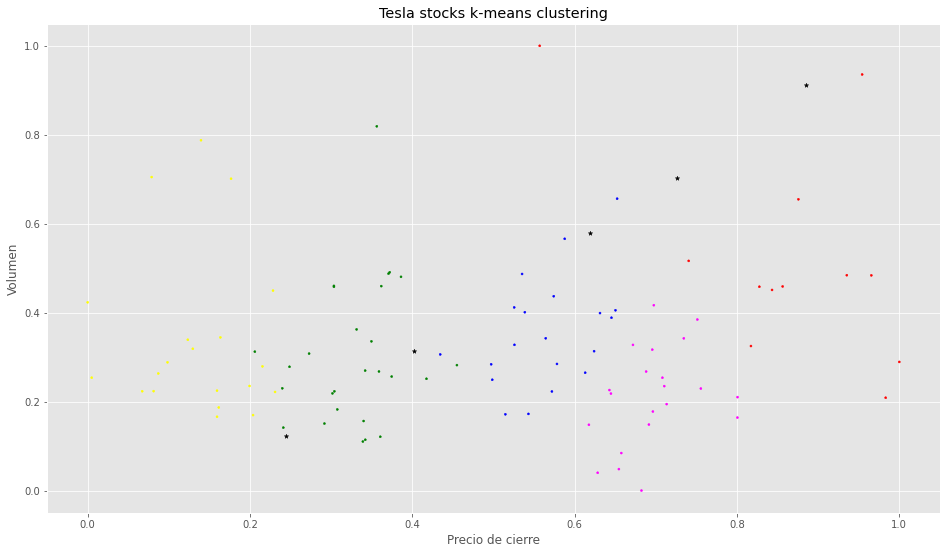

In [97]:
#%% Plot k-means clustering.
colores=['red','green','blue','yellow','fuchsia']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.scatter(x, y, c=asignar, s=4)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('Precio de cierre')
plt.ylabel('Volumen')
plt.title('Tesla stocks k-means clustering')
plt.show()